# Lab 2:  Millikan Oil Experiment 

Author: Jonathan Hasan 

Partner: Jude Riley 

Class: Modern Physics 330 

Date: 3/3/2022

This notebook is where the data analysis was performed for the millikan oil drop experiment. 
The charge was calculated and plotted in order to determine what the charge of a single electron is. 

Perform calculations to see what the charge on an oil droplet is and from that the number of electrons. Uncertainties were propagated through to according to Taylor's quadrature methods 

# Import Libraries 

In [89]:
import numpy as np 

import matplotlib.pyplot as plt 

import math

from scipy import odr

%matplotlib notebook

## Define functions to be used 

### Uncertainty functions 

Quadrature functions are more accurate perhaps because the experiment involves small particles 

In [90]:
def multiply_uncertainties(a, del_a, b, del_b):
    q = a*b
    
    #del_q = q * ((del_a/a)+(del_b/b))
    del_q = q * np.sqrt(((del_a/a)**2+(del_b/b)**2))
    
    return q, del_q 
    

In [91]:
def divide_uncertainties(a, del_a, b, del_b): 
    q = a/b
    
    #del_q = q * ((del_a/a)+(del_b/b))
    del_q = q * np.sqrt(((del_a/a)**2+(del_b/b)**2))
    
    return q, del_q     


In [92]:
def power_rule(num, del_num, power): 
    q = num**power
    
    del_q = np.abs(power) * q * (del_num/np.abs(num))
    
    return q, del_q

In [93]:
def add_uncertainties(a, del_a, b, del_b):
    q = a+b
    
    #del_q = (del_a/a+del_b/b)
    del_q = np.sqrt(del_a**2 + del_b**2) 
    
    return q, del_q

In [94]:
def relative_uncertanties(best_estimates, uncertainties):
    frac = []
    
    for best_estimate, uncertainty in zip(best_estimates, uncertainties):
        frac.append((uncertainty/best_estimate)*100)
    
    return frac 

### Functions for Stokes and charge_equation

In [95]:
def stokes(eta, vf, v_unc,  rho): 
    
    part1, del_1 = multiply_uncertainties(9.0*eta, 0, vf, v_unc)
    
    part2,del_2 = multiply_uncertainties(2.0*rho*9.81, 0, 1, 0)
    
    part3, del_3 = divide_uncertainties(part1, del_1, part2, del_2)
    
    
    result, del_result = power_rule(part3, del_3, .5)
    
    
    return result, del_result



In [96]:
def charge_millikan(d,d_del, rho, eta, P, a, del_a,  b, vf, vr, vf_unc, vr_unc,  V):
    
    #term 1 evaluated here 
    
    #Cascade perform operations until final result is achieved. 
    
    part1, del_1 = multiply_uncertainties((4/3)*np.pi, 0, d, d_del)
    
    part_2, del_2 = divide_uncertainties(1,0,(9.81*rho),0)
    
    part_3, del_3 = multiply_uncertainties(4.5,0, eta,0)
    
    part_3, del_3 = power_rule(part_3, del_3, 3)
    
    part_4, del_4 = multiply_uncertainties(part_2, del_2, part_3, del_3)
    

    part_5, del_5 = power_rule(part_4, del_4, .5)
    
    term1, del_term1 = multiply_uncertainties(part1, del_1, part_5, del_5)
    
    
    #term 2 cascade evaluated here 
    part_6, del_6 = multiply_uncertainties(P, 0, a, del_a)
    
    part_7, del_7 = divide_uncertainties(b, 0, part_6, del_6)
    
    part_8, del_8 = add_uncertainties(1, 0, part_7, del_7)
    
    part_9, del_9 = divide_uncertainties(1, 0, part_8, del_8)
    
    term_2, del_term2 = power_rule(part_9, del_9, 1.5)
    
    
    #Term 3 cascade evaluated here 
    
    
    part_10, del_10 = add_uncertainties(vf, vf_unc, vr, vr_unc)
    
    part_11, del_11 = power_rule(vf, vf_unc, .5)
    
    part_12, del_12 = multiply_uncertainties(part_10, del_10, part_11, del_11)
    
    
    term3, del_term3 = divide_uncertainties(part_12, del_12, V, 0) 
    
    
    # Multiply all three terms together while propagating uncertainties
    total, del_total = multiply_uncertainties(term1, del_term1, term3, del_term3)
    
    total, del_total = multiply_uncertainties(total, del_total, term_2, del_term2)

    
    return total, del_total

# Define variables to be used

The constants needed for the calculations are defined below 


### Systematic error found here

Had .005 for the d_del when d was equal to .1. This amounted to a 50% error that propagated throughout the entire calculation. Since the true uncertainty of .00005 was found through the help of Professor Beardsley, the calculations have been of far better quality 

In [97]:
b = 8.2* 10**-3 #constant Pa*m 

rho_oil = 886  #density of oil 

rho_air = 1.2225 # density of air 

P = 99.88 * 1000 #* Pa

eta = 1.836*10**-5 # Ns/m^2

d = .0077 # seperation of plates in meters

d_del = .000005 # smallest increment on pitch micrometer in meters 

V = 200 # Charge between plates

## Analysis of Oil Droplets - Dataset 1 

First begin by defining the velocity arrays. These were calculated by averaging the positive and negative times seperately. Then the standard deviations of the mean were calculated with the formula 

$\sigma_{unc} = \frac{\sigma_{std}}{\sqrt{N}}$

# Analysis of Millikan Oil drops with Dataset 2

It came to my attention that I failed to choose slow drops due to the stokes law correction requiring velocities between .01 and .001 cm/s. I attempted to reacquire better data points so that a better analysis could be conducted. 

In [98]:
#Velocities here 

#Values are calcualted from the excel sheets on the OSF webpage 
vr_1 = (np.array([.381419342, .5429345,.6357439, .508329,.4366887, .5074149])/1000) # rising velocity m/s

vf_1 = (np.array([.451482, .47101, .77023, .58702, .51787, .60084])/1000).tolist()   # falling velocity m/s

vr_unc_1 = (np.array([.066009,.038741,.016545, .01623, .016374, .017955])/1000).tolist()

vf_unc_1 = (np.array([.025284,.09112, .039147 , .025433, .018501, .051381])/1000).tolist()


vr_2 = (np.array([.070022774, .03683,.149807, .297423, 0, .2872257, .050301407, .031541])/1000).tolist() # rising velocity m/s

vf_2 = (np.array([.07447, .09679, .08101, .21098, .13184, .4268, .08771, .10343])/1000).tolist()   # falling velocity m/s

vr_unc_2 = (np.array([.007867736,.011722,.010708, .057045, 0, .009124,.014285,.009464])/1000).tolist()

vf_unc_2 = (np.array([.010359352,.0008028, .040861 , .025269, .011593, .022073,.009317,.009318])/1000).tolist()




### Create charge lists and uncertainty charge lists for making plots

Create a charge list and an uncertainty charge list. List will be appended with values from for loop 

In [99]:
charge_list_1 = []
del_charge_list_1 = []
charge_list_2 = []
del_charge_list_2 = []


for vf,vr, vf_unc, vr_unc in zip(vf_1, vr_1, vf_unc_1, vr_unc_1):
    a, del_a = stokes(eta, vf, vf_unc, rho_air) #m
    charge, del_charge = charge_millikan(d,d_del, rho_oil, eta, P, a, del_a, b, vf, vr,vf_unc, vr_unc, V )
    charge_list_1.append(charge)
    del_charge_list_1.append(del_charge)


for vf,vr, vf_unc, vr_unc in zip(vf_2, vr_2, vr_unc_2, vf_unc_2):
    a, del_a = stokes(eta, vf,vf_unc, rho_air) #m
    charge, del_charge = charge_millikan(d,d_del, rho_oil, eta, P, a, del_a, b, vf, vr, vf_unc,vr_unc, V )
    charge_list_2.append(charge)
    del_charge_list_2.append(del_charge)


Calculate amount of charge on each droplet. Keeping 1 sig fig because one of the uncertanties has a 1 in the most significant digit.  

In [100]:
count = 1

print("Dataset 1 ")
for charge, del_charge in zip(charge_list_1, del_charge_list_1):
    print("The charge on oil droplet  " + str(np.round(count,1)) + " is (" + str(np.round(charge/(1*10**-18),1)) + " +/- " + str(np.round(del_charge/(1*10**-18),1)) + ") * 10^-18 C" + "\n")
    count+=1

count_2 = 1 

print("Dataset 2")

for charge, del_charge in zip(charge_list_2, del_charge_list_2):
    print("The charge on oil droplet  " + str(np.round(count_2,1)) + " is (" + str(np.round(charge/(1*10**-18),1)) + " +/- " + str(np.round(del_charge/(1*10**-18),1)) + ") * 10^-18 C" + "\n")
    count_2+=1
    
    

Dataset 1 
The charge on oil droplet  1 is (22.9 +/- 2.1) * 10^-18 C

The charge on oil droplet  2 is (28.5 +/- 3.9) * 10^-18 C

The charge on oil droplet  3 is (50.6 +/- 2.0) * 10^-18 C

The charge on oil droplet  4 is (34.4 +/- 1.2) * 10^-18 C

The charge on oil droplet  5 is (28.2 +/- 0.9) * 10^-18 C

The charge on oil droplet  6 is (35.2 +/- 2.3) * 10^-18 C

Dataset 2
The charge on oil droplet  1 is (1.6 +/- 0.2) * 10^-18 C

The charge on oil droplet  2 is (1.7 +/- 0.2) * 10^-18 C

The charge on oil droplet  3 is (2.7 +/- 0.5) * 10^-18 C

The charge on oil droplet  4 is (9.6 +/- 1.7) * 10^-18 C

The charge on oil droplet  5 is (2.0 +/- 0.2) * 10^-18 C

The charge on oil droplet  6 is (19.1 +/- 0.7) * 10^-18 C

The charge on oil droplet  7 is (1.7 +/- 0.2) * 10^-18 C

The charge on oil droplet  8 is (1.8 +/- 0.2) * 10^-18 C



# Plot results from Dataset1 and Dataset 2

<IPython.core.display.Javascript object>


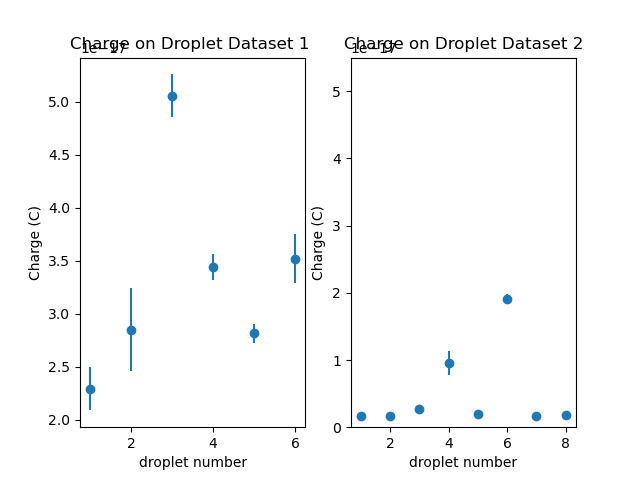

In [166]:
plt.figure()

x = np.arange(1,len(charge_list_1)+1,1)

plt.subplot(1,2,1)

plt.errorbar(x, np.array(charge_list_1), xerr = 0, yerr = np.array(del_charge_list_1), ls = 'none')

plt.scatter(x, np.array(charge_list_1))

plt.xlabel('droplet number')

plt.ylabel('Charge (C)')

plt.title("Charge on Droplet Dataset 1 ")

plt.savefig("Figures/ChargesFromDataset1")


plt.subplot(1,2,2)

x = np.arange(1,9,1)

plt.errorbar(x, np.array(charge_list_2), xerr = 0, yerr = np.array(del_charge_list_2), ls = 'none')

plt.scatter(x, np.array(charge_list_2))

plt.xlabel('droplet number')

plt.ylabel('Charge (C)')

plt.ylim(0,5.5*10**-17)


plt.title("Charge on Droplet Dataset 2")

plt.savefig("Figures/ChargesFromDataset1and2")

So it can be concluded that the droplets that are moving faster have higher charges present. 

There also seems to be larger uncertainties on the first dataset as opposed to the second dataset. 

However, fractional uncertanties need to be investigated as well 

# Calculate relative uncertanties for both datasets

Need to calculate uncertanties in terms of percentages for each datapoint in the dataset 

### Dataset 1 

In [102]:
count = 1 

for x in relative_uncertanties(charge_list_1, del_charge_list_1):
    print("The fractional uncertainty for droplet " + str(count) + " is: " + str(x) + " %")
    count+=1

The fractional uncertainty for droplet 1 is: 8.936928055680022 %
The fractional uncertainty for droplet 2 is: 13.745089558170646 %
The fractional uncertainty for droplet 3 is: 3.9496193419069985 %
The fractional uncertainty for droplet 4 is: 3.5048190618404487 %
The fractional uncertainty for droplet 5 is: 3.1454545180728157 %
The fractional uncertainty for droplet 6 is: 6.511960895917847 %


Fractional uncertanties range from 3.14 - 13.74%

Average fractional uncertainty for this dataset calculated with function 

In [103]:
np.round(np.mean(relative_uncertanties(charge_list_1, del_charge_list_1)),1)

6.6

### Dataset 2 

In [104]:
count = 1 

for x in relative_uncertanties(charge_list_2, del_charge_list_2):
    print("The fractional uncertainty for droplet " + str(count) + " is: " + str(x) + " %")
    count+=1

The fractional uncertainty for droplet 1 is: 10.43837515986784 %
The fractional uncertainty for droplet 2 is: 10.676741353065557 %
The fractional uncertainty for droplet 3 is: 19.457518575152587 %
The fractional uncertainty for droplet 4 is: 18.258492610686996 %
The fractional uncertainty for droplet 5 is: 8.793473981794085 %
The fractional uncertainty for droplet 6 is: 3.5122627961027266 %
The fractional uncertainty for droplet 7 is: 14.79961966422735 %
The fractional uncertainty for droplet 8 is: 10.851890609113681 %


Fractional uncertainties range from 3.5 - 18.25 %

Average fractional uncertainty for this dataset 

In [105]:
np.round(np.mean(relative_uncertanties(charge_list_2, del_charge_list_2)),1)

12.1

So the fractional uncertainty nearly doubled from dataset 1 to dataset 2. 

# Calculate the charge of the electron 

Now with the analysis on the two other datasets complete, it is now time to combine them. 

In [106]:
#Create master lists and append elements from each dataset to respective list 

charge_list = []

del_charge_list = []


for element in charge_list_1: 
    charge_list.append(element)
    
for element in del_charge_list_1: 
    del_charge_list.append(element)
    

for element in charge_list_2: 
    charge_list.append(element)
    
for element in del_charge_list_2: 
    del_charge_list.append(element)



In [107]:
charge_list

[2.2939358720618858e-17,
 2.85244184729863e-17,
 5.0603370304538294e-17,
 3.4408382580035876e-17,
 2.8160735420472096e-17,
 3.5222006105562254e-17,
 1.6110373690102714e-18,
 1.6995917170897865e-18,
 2.6847440555881955e-18,
 9.562097816173457e-18,
 1.958503497851231e-18,
 1.911904702899538e-17,
 1.6706797396669028e-18,
 1.774961737047706e-18]

In [108]:
del_charge_list

[2.0500739852960687e-18,
 3.9207068650593386e-18,
 1.998640501204867e-18,
 1.2059515515360859e-18,
 8.857831246057713e-19,
 2.2936432643520106e-18,
 1.6816612454295658e-19,
 1.814610116918022e-19,
 5.22384573311378e-19,
 1.7458949231926934e-18,
 1.7222049551607508e-19,
 6.715111757687884e-19,
 2.472542472780053e-19,
 1.926169060580411e-19]

### Organizing dataset

Want to organize the dataset but the uncertanties will become scattered. Need to make a multidimensional list 


In [109]:
multi = []

for charge, del_charge in zip(charge_list, del_charge_list):
    multi.append([charge, del_charge])
    
                              

In [110]:
multi = np.array(multi)

multi

array([[2.29393587e-17, 2.05007399e-18],
       [2.85244185e-17, 3.92070687e-18],
       [5.06033703e-17, 1.99864050e-18],
       [3.44083826e-17, 1.20595155e-18],
       [2.81607354e-17, 8.85783125e-19],
       [3.52220061e-17, 2.29364326e-18],
       [1.61103737e-18, 1.68166125e-19],
       [1.69959172e-18, 1.81461012e-19],
       [2.68474406e-18, 5.22384573e-19],
       [9.56209782e-18, 1.74589492e-18],
       [1.95850350e-18, 1.72220496e-19],
       [1.91190470e-17, 6.71511176e-19],
       [1.67067974e-18, 2.47254247e-19],
       [1.77496174e-18, 1.92616906e-19]])

In [111]:
#Source Steve on Stack Overflow. Preserves pairing while organizing by the first column

multi = multi[multi[:, 0].argsort()]

In [112]:
multi

array([[1.61103737e-18, 1.68166125e-19],
       [1.67067974e-18, 2.47254247e-19],
       [1.69959172e-18, 1.81461012e-19],
       [1.77496174e-18, 1.92616906e-19],
       [1.95850350e-18, 1.72220496e-19],
       [2.68474406e-18, 5.22384573e-19],
       [9.56209782e-18, 1.74589492e-18],
       [1.91190470e-17, 6.71511176e-19],
       [2.29393587e-17, 2.05007399e-18],
       [2.81607354e-17, 8.85783125e-19],
       [2.85244185e-17, 3.92070687e-18],
       [3.44083826e-17, 1.20595155e-18],
       [3.52220061e-17, 2.29364326e-18],
       [5.06033703e-17, 1.99864050e-18]])

In [113]:
charge_list_sorted = multi[:,0]

In [114]:
del_charge_list_sorted = multi[:,1]

<IPython.core.display.Javascript object>


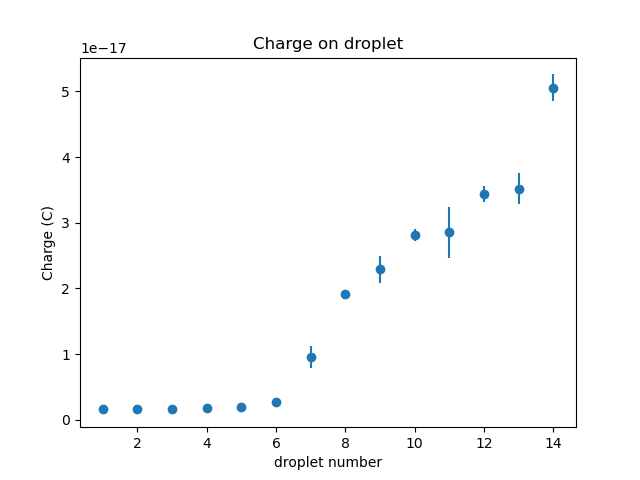

In [167]:
plt.figure()

x = np.arange(1,len(charge_list_sorted)+1,1)

plt.errorbar(x, charge_list_sorted, xerr = 0, yerr = del_charge_list_sorted, ls = 'none')

plt.scatter(x, np.array(charge_list_sorted, dtype = 'object'))

plt.xlabel('droplet number')

plt.ylabel('Charge (C)')

plt.title("Charge on droplet")

plt.savefig('Figures/OrganizedChargesOnDroplet')

# Group the droplets by predicted number of electrons


Group particles into domains by plotting charge vs number of electrons. Looks like there are 6 groups here 

In [168]:
Electron_num = np.array([1,1,1,1,1,1,2,3,4,4,4,5,5,6])

<IPython.core.display.Javascript object>


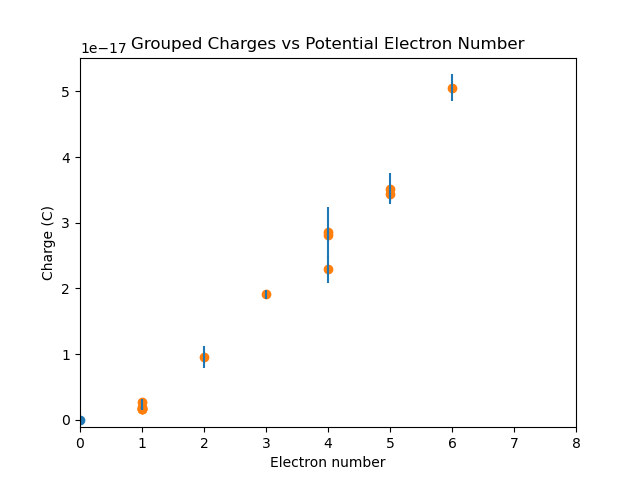

In [170]:
plt.figure()


plt.errorbar(Electron_num, charge_list_sorted, xerr = 0, yerr = del_charge_list_sorted, ls = 'none')

plt.scatter(0, 0)

plt.scatter(Electron_num, multi[:,0])


plt.xlabel('Electron number')

plt.ylabel('Charge (C)')

plt.title("Grouped Charges vs Potential Electron Number")

plt.xlim(0,8)

plt.savefig('Figures/PlotofGroupedChargevsElectron')

# Average the charges and uncertainties for each of the groups 

In [171]:
#Take average of groups 1, 4, 5 for best estimates and uncertainties
charge_ave_1 = np.mean(charge_list_sorted[0:6])

del_charge_ave_1 = np.mean(del_charge_list_sorted[0:6])

charge_ave_4 = np.mean(charge_list_sorted[8:11])

del_charge_ave_4 = np.mean(del_charge_list_sorted[8:11])

charge_ave_5 = np.mean(charge_list_sorted[11:13])

del_charge_ave_5 = np.mean(del_charge_list_sorted[11:13])


# Create data arrays for the orthogonal distance regression algorithm 

ODR_y = np.array([charge_ave_1, charge_list_sorted[6], charge_list_sorted[7], charge_ave_4, charge_ave_5, charge_list_sorted[13]])

sy = np.array([del_charge_ave_1, del_charge_list_sorted[6], del_charge_list[7], del_charge_ave_4, del_charge_ave_5, del_charge_list[13]])

<IPython.core.display.Javascript object>


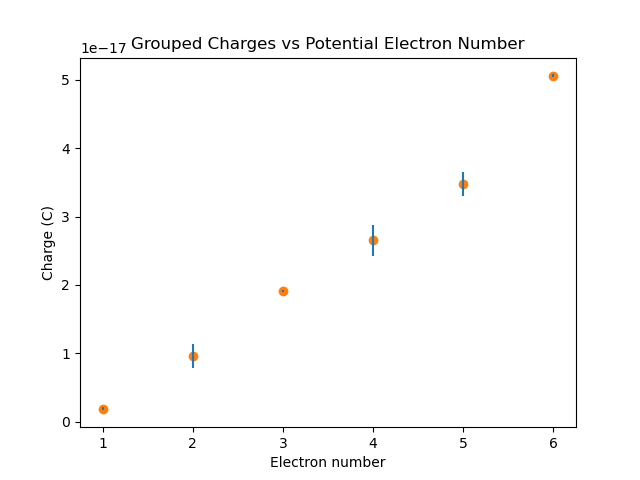

In [173]:
plt.figure()

x = np.arange(1,ODR_y.size+1, 1)

plt.errorbar(x, ODR_y, xerr = 0, yerr = sy, ls = 'none')

plt.scatter(0, 0)

plt.scatter(x, ODR_y)


plt.xlabel('Electron number')

plt.ylabel('Charge (C)')

plt.title("Grouped Charges vs Potential Electron Number")

plt.savefig('Figures/AverageGroupedChargesVsPotentialElectronNumber')

# ODR Fitting 

Need to fit a plot describing the data. 

The model will be linear but the intercept will be removed. 

Why? Because if there were no electrons, there would be 0 charge. 

So model will just be : y = mx

In [174]:
def f(B,x):
    
    '''Linear function '''
    ''' This is the model that is believed to accurately predict the data'''
    '''B[0] is the slope and B[1] is the intercept'''
    
    return B[0]*x

In [175]:
linear = odr.Model(f)

In [176]:
# Changing amount of electrons to see what changes slope 




In [177]:
data = odr.RealData(x, ODR_y, sy = sy) 

In [178]:
myodr = odr.ODR(data, linear, beta0 = [0])

In [179]:
myoutput = myodr.run() 

In [180]:
myoutput.pprint() 

Beta: [7.88978573e-18]
Beta Std Error: [1.46667864e-17]
Beta Covariance: [[7.04367585e-37]]
Residual Variance: 305.4010842130178
Inverse Condition #: 1.0
Reason(s) for Halting:
  Sum of squares convergence


In [181]:
#Setup the variables to use 

B_0 = myoutput.beta[0] 

B_0_err = myoutput.sd_beta[0]



In [182]:
B_0

7.889785728117468e-18

<IPython.core.display.Javascript object>


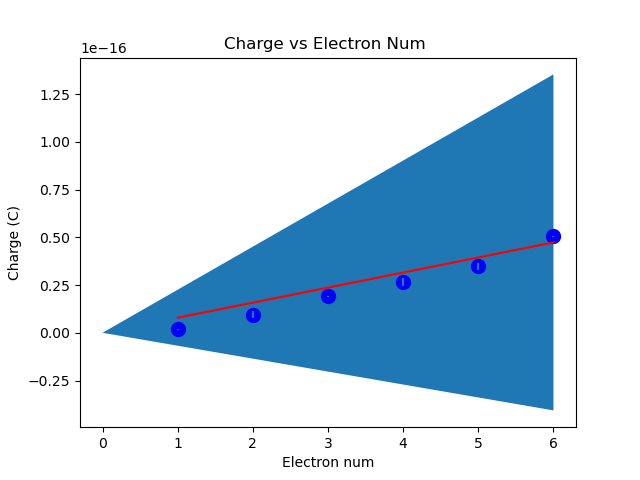

Beta_0 for x_mod_0 (Original)  is: (78.9 +/-  146.7) * 10 ** -19 C/e


In [188]:


# Set up the figure for plotting 

plt.figure()


print("Beta_0 for x_mod_0"  + " (Original) " + " is: (" + str(np.round(B_0/(1*10**-19),1)) +" +/-  "+ str(np.round(B_0_err/(1*10**-19),1)) + ") * 10 ** -19 C/e")



x_1 = np.arange(0,np.max(x)+1,1)

plt.fill_between(x_1, ((B_0 - B_0_err)*x_1)  , ((B_0 + B_0_err)*x_1))

plt.errorbar(x, ODR_y, yerr = sy, ls ='none')

plt.scatter(x, ODR_y , s = 100, color = "blue")

plt.plot(x, B_0 * x, color = 'red')

#creates the text showing slope and intercept as well as cutoff frequency 



#Add labels to voltage frequency 
plt.xlabel("Electron num")

plt.ylabel("Charge (C)")


plt.title("Charge vs Electron Num ")

plt.savefig("Figures/ChargevsElectronNum")

        


Calculated charge per electron is: $(78.9 +/- 146.7) * 10 ^{-19} \frac{C}{e} $ 

# Conclusions

Answer the questions: 

<strong> 1. What was the minimum charge found? What can you say about the charge of the electron? </strong>

<strong>2.What evidence was there for negative charge?</strong>

<strong>3. Do you see evidence of a quantized nature of the electron?</strong>

<strong>4. How does your answer compare to Codata? Can you explain any discrepancies?</strong>

## Question 1: What was the minimum charge? What can you say about the charge of the electron? 

In [185]:
minimum_charge = multi[0][:][0]

minimum_uncertainty = multi[0][:][1]

F"The minimum charge found was: ({np.round(((minimum_charge)/(1*10**-19)),1)} +/- {(np.round((minimum_uncertainty/(1*10**-19)),1))}) * 10 ^ -19 C"


'The minimum charge found was: (16.1 +/- 1.7) * 10 ^ -19 C'

Applying two standard deviations of the mean, the charge of the electron is less than or equal to $ 19.5 * 10 ^{-19} C$. 

## Question 2 : Was there any evidence of negative charge?

The very presence of rise times indicates that there was negative charges present. The more electrons there were the larger the velocity was. This was confirmed by the dataset1 and dataset2 comparisons. 

## Question 3: Was there any evidence of the quantized nature of electrons?

Figure 6 and Figure 7 show what seems to be incremental steps between the different electron groups.

There do seem to be integer increments for different number of droplets. Looking at the graphs, they seem to be rising by a constant amount for the first four trials. On average, it seems to increment by 8.228 * 10 ** -18 C per level. 

The standard deviation of the differences seems to be .95 * 10 ** -18 C which rounds up to 1 * 10 ** -18 C

In [135]:
diff = []

for i in np.arange(5):
    diff.append(ODR_y[i+1] - ODR_y[i])

diff

[7.662178130131109e-18,
 9.556949212821922e-18,
 7.422457175697039e-18,
 8.273690138106644e-18,
 1.5788175961739232e-17]

In [136]:
np.mean(diff[0:4])

8.228818664189178e-18

In [137]:
np.std(diff[0:4], ddof = 1)

9.552040878513715e-19

## Question 4: What was the charge of the electron (i.e. slope of graph)? How does the answer for slope compare to official values such as From Codata? Can any deviations be explained? 

The slope of the equation was found to be $(78.8 +/- .51) * 10^{-18}C/e$. 

The official value from Codata was found to be $1.602*10^{-19} C$ exactly. 

Thus the percent error can be calculated to be 

$\frac{78.8 - 1.602}{1.602} * 100 = 4818.85 percent error$

Number of standard deviations from mean 

$\frac{78.8 - 1.602}{.51} = 151.36 \sigma$

The only way these results could be off is from incorrectly attributing the number of electrons to each group. To refine the conclusion further, more trials would need to be taken in order to get more precise increments and thus a better slope. 

Comparing the slope found from the ODR to the starting charge and the order of magnitude of the starting charge, suggests that there is an issue with predicted number of electrons. The slope has a magnitude of $10^{-18}$ whereas the first charge has $10^{-19}$

The post mortem analysis will attempt to investigate this further. 

# Post-Mortem analysis 

With the results supposedly being explained by the incorrect number of electrons, it is time to perform an additional  analysis with the official charge being acquired from CODATA as 

$1.602 * 10 ** -19 C$



If there were different numbers of electrons, I could scale the input vector by a scalar to get different numbers of electrons

In [138]:
x_original = x 

x_mod_1 = x*10

x_mod_2 = x*20 

x_mod_3 = x*30

x_mod_4 = x*40

x_mod_5 = x*50

x_mod_array = [x_original, x_mod_1, x_mod_2, x_mod_3, x_mod_4, x_mod_5]

In [139]:
x_mod_array[0][:]

array([1, 2, 3, 4, 5, 6])

In [140]:
ODR_array = [odr.RealData(x, ODR_y, sy) for x in x_mod_array]

In [141]:
myodr_array = [odr.ODR(data, linear, beta0 = [0]) for data in ODR_array]

In [142]:
myoutput_array = [myodr.run() for myodr in myodr_array] 

In [143]:
[myoutput.pprint() for myoutput in myoutput_array]

Beta: [7.27740073e-18]
Beta Std Error: [5.1016184e-19]
Beta Covariance: [[0.01098902]]
Residual Variance: 2.3684113318512054e-35
Inverse Condition #: 1.0
Reason(s) for Halting:
  Sum of squares convergence
Beta: [7.27740073e-19]
Beta Std Error: [5.10161602e-20]
Beta Covariance: [[0.00010989]]
Residual Variance: 2.368411331851204e-35
Inverse Condition #: 1.0
Reason(s) for Halting:
  Sum of squares convergence
Beta: [3.63870037e-19]
Beta Std Error: [2.55080801e-20]
Beta Covariance: [[2.74725147e-05]]
Residual Variance: 2.368411331851204e-35
Inverse Condition #: 1.0
Reason(s) for Halting:
  Sum of squares convergence
Beta: [2.42580024e-19]
Beta Std Error: [1.70053861e-20]
Beta Covariance: [[1.22100056e-05]]
Residual Variance: 2.3684113318512054e-35
Inverse Condition #: 1.0
Reason(s) for Halting:
  Sum of squares convergence
Beta: [1.81935018e-19]
Beta Std Error: [1.27540401e-20]
Beta Covariance: [[6.86812867e-06]]
Residual Variance: 2.368411331851204e-35
Inverse Condition #: 1.0
Reason(s)

[None, None, None, None, None, None]

In [144]:
#Setup the variables to use 

B_0_array = [myoutput.beta[0] for myoutput in myoutput_array] 

B_0_err_array = [myoutput.sd_beta[0] for myoutput in myoutput_array] 


<IPython.core.display.Javascript object>


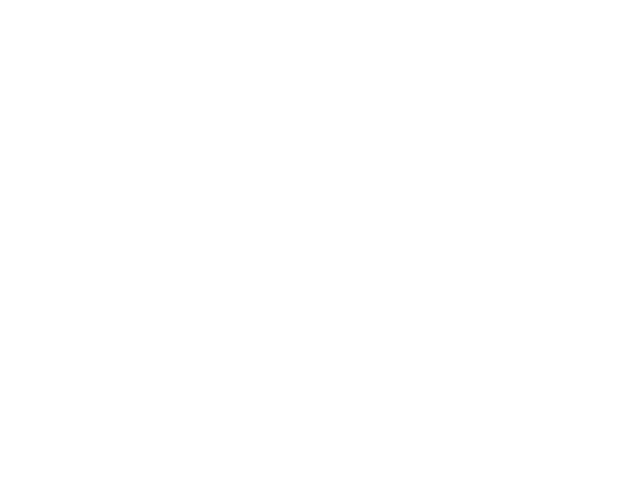

<IPython.core.display.Javascript object>


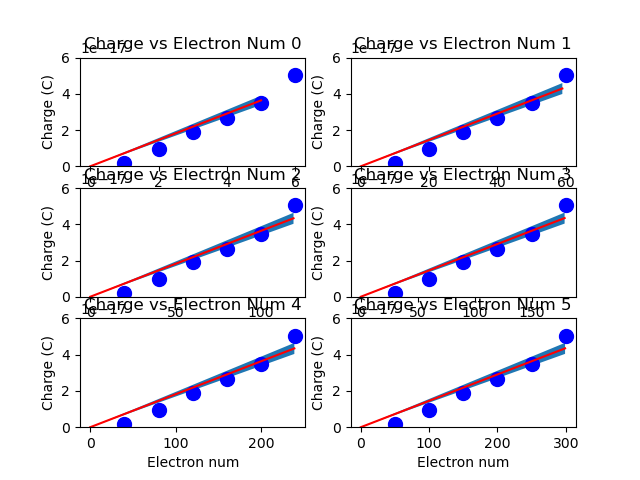

Beta_0 for x_mod 0 (Original)  is: (72.8 +/- 5.1) * 10 ^-19 C/e
Beta_0 for x_mod 1 is: (7.3 +/- 0.5) * 10 ^ -19 C/e
Beta_0 for x_mod 2 is: (3.6 +/- 0.3) * 10 ^ -19 C/e
Beta_0 for x_mod 3 is: (2.4 +/- 0.2) * 10 ^ -19 C/e
Beta_0 for x_mod 4 is: (1.8 +/- 0.1) * 10 ^ -19 C/e
Beta_0 for x_mod 5 is: (1.5 +/- 0.1) * 10 ^ -19 C/e


In [145]:
rows = 3

columns = 2

count = 1

num = 0 

# Set up the figure for plotting 

plt.figure()

#scatter plot of points 

plt.subplots(3,2)

for i in np.arange(1,rows+1,1):
    
    for j in np.arange(1,columns+1,1):
        
        if num == 0: 
            
            print("Beta_0 for x_mod " + str(num) + " (Original) " + " is: (" + str(np.round(B_0_array[num]/(1*10**-19),1)) + " +/- " +str(np.round(B_0_err_array[num]/(1*10**-19),1)) +  ") * 10 ^-19 C/e")
            
          
        else:
             print("Beta_0 for x_mod " + str(num) + " is: (" + str(np.round(B_0_array[num]/(1*10**-19),1)) + " +/- " +str(np.round(B_0_err_array[num]/(1*10**-19),1)) +  ") * 10 ^ -19 C/e")
        
        
        plt.subplot(3,2,count) 

        plt.scatter(x_mod_array[num][:], ODR_y , s = 100, color = "blue", zorder = 2)

        x_1 = np.arange(0, np.max(x_mod_array[num]), 1)

        plt.plot(x_1, B_0_array[num] * x_1, color = 'red')


        plt.fill_between(x_1, ((B_0_array[num] - B_0_err_array[num])*x_1)  , ((B_0_array[num] + B_0_err_array[num])*x_1))

        #creates the text showing slope and intercept as well as cutoff frequency 



        #Add labels to voltage frequency 
        plt.xlabel("Electron num")

        plt.ylabel("Charge (C)")

        plt.ylim(0, 6*10**-17)

        plt.title("Charge vs Electron Num " + str(num))
        
        count+=1 
        num+=1 
        

In [147]:
#first row is x_mod_0, second is x_mod_1......

x_mod_array[:][:]

[array([1, 2, 3, 4, 5, 6]),
 array([10, 20, 30, 40, 50, 60]),
 array([ 20,  40,  60,  80, 100, 120]),
 array([ 30,  60,  90, 120, 150, 180]),
 array([ 40,  80, 120, 160, 200, 240]),
 array([ 50, 100, 150, 200, 250, 300])]

Using information known from Codata 

If I were to look at the other predictions x_mod_4 and x_mod_5 were far closer to the true value. The percent error for these two was 


x_mod_4 : [40, 80, 120, 160, 200, 240]

$\frac{1.819 - 1.602}{1.819} * 100 = 11.9 percent error$

$\frac{1.8 - 1.602}{.1} * 100 = 1.98\sigma$


x_mod_5 : [50, 100, 150, 200, 250, 300]

$\frac{1.455 - 1.602}{1.819} * 100 = 9.8 percent error$

$\frac{1.5 - 1.602}{.1} * 100 = 1\sigma$

Thus, for the post mortem analysis, It seems that the error comes from not predicting the number of electrons correctly on the grouped charges. If I were to divide the ODR_y by the true charge, I would find that the true electron count would be close to x_mod_4 and x_mod_5. 

In [148]:
## Using knowledge of true charge of electron from CODATA

charge_electron = 1.602*10**-19

num_electrons = np.round(ODR_y/charge_electron)

num_electrons

array([ 12.,  60., 119., 166., 217., 316.])

What is the average discrepancy between number of electrons for each group? 

In [149]:
# For x-mod_4

np.mean(np.abs(num_electrons-x_mod_4))

24.666666666666668

In [150]:
#for x_mod_5

np.mean(np.abs(num_electrons-x_mod_5))

32.0

The num electrons array show the true amount of electrons on each droplet. x_mod 4 and 5 are far closer than the original array but they are still off considerably. On avrage, x_mod_4 is off by 25 electrons and x_mod_5 is off by 32 electrons. 

Using this electron_num instead of the x_mods would get me the correct prediction as found by millikan. 

<IPython.core.display.Javascript object>


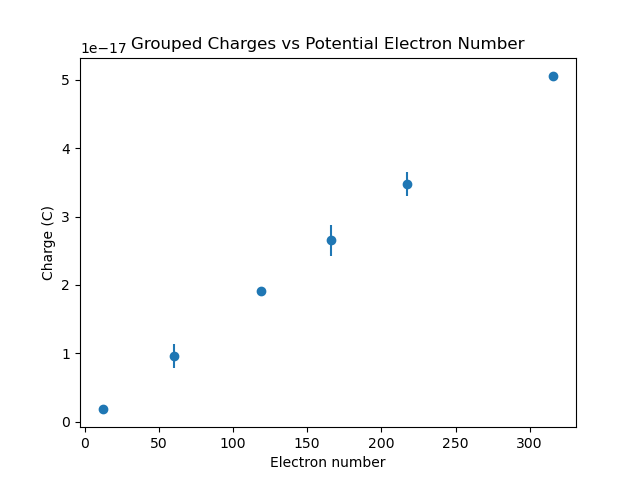

In [151]:
plt.figure()

x = np.arange(1,ODR_y.size+1, 1)

plt.errorbar(num_electrons, ODR_y, xerr = 0, yerr = sy, ls = 'none')

plt.scatter(num_electrons, ODR_y)


plt.xlabel('Electron number')

plt.ylabel('Charge (C)')

plt.title("Grouped Charges vs Potential Electron Number")

plt.savefig('GroupedChargesVsPotentialElectronNumber')

In [152]:
def f(B,x):
    
    '''Linear function '''
    ''' This is the model that is believed to accurately predict the data'''
    '''B[0] is the slope and B[1] is the intercept'''
    
    return B[0]*x

In [153]:
linear = odr.Model(f)

In [154]:
mydata = odr.RealData(num_electrons, np.array(ODR_y), sy = (np.array(sy)))

In [155]:
myodr = odr.ODR(mydata, linear, beta0=[0]) 

In [156]:
myoutput = myodr.run()

In [157]:
myoutput.pprint()

Beta: [1.60208711e-19]
Beta Std Error: [1.10604677e-22]
Beta Covariance: [[5.38828637e-43]]
Residual Variance: 0.022703683152088847
Inverse Condition #: 1.0
Reason(s) for Halting:
  Sum of squares convergence


# True Slope 

In [158]:
print("True slope found to be: (" + str(np.round(myoutput.beta[0]/(1*10**-19),1)) + " +/- " + str(np.round(myoutput.sd_beta[0]/(1*10**-19),4)) + ") * 10 ^-19 C/e")

True slope found to be: (1.6 +/- 0.0011) * 10 ^-19 C/e


# Correct plot with true slope 

In [159]:
#Setup the variables to use 

B_0 = myoutput.beta[0]

B_0_err = myoutput.sd_beta[0] 


<IPython.core.display.Javascript object>


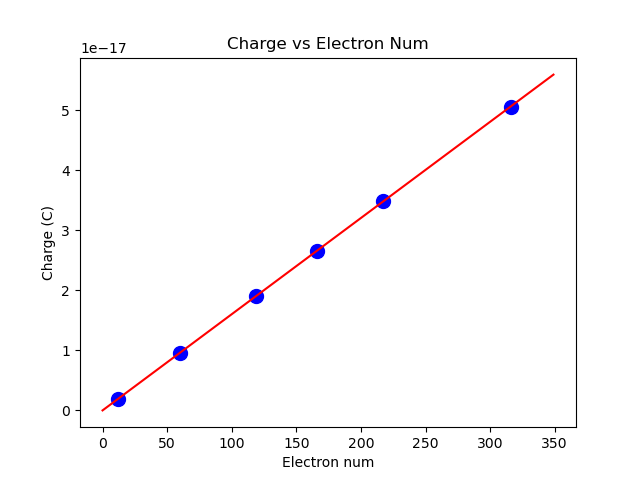

In [160]:

plt.figure()

#scatter plot of points 


plt.scatter(num_electrons, ODR_y , s = 100, color = "blue", zorder = 2)

x_1 = np.arange(0, 350, 1)

plt.plot(x_1, B_0 * x_1, color = 'red')


# creates the red trendline with base coefficients and the standard errors


          
plt.fill_between(x_1, ((B_0 - B_0_err)*x_1)  , ((B_0 + B_0_err)*x_1))

#creates the text showing slope and intercept as well as cutoff frequency 



#Add labels to voltage frequency 
plt.xlabel("Electron num")

plt.ylabel("Charge (C)")

plt.title("Charge vs Electron Num")

plt.savefig("ChargeSlope")

A perfect line then forms going through all points as expected. This was close to x_mod_4 and x_mod_5. 

The error thus would have come from incorrectly predicting the amount of electrons that were on the droplets. Thinking back to question 3 if I were to see the number of electrons between increments they would definitely be larger than 1. 

In [161]:
np.array(diff)/charge_electron

array([47.82882728, 59.65636213, 46.3324418 , 51.64600586, 98.55290863])

In fact on average the changes for the first four were 

In [162]:
mean_val = np.mean(diff[0:4])

In [163]:
np.round(mean_val/charge_electron)

51.0

An average of 51 electrons every increment. 

Even though some of the droplets had really slow rise velocities, there were still many electrons present. This could only be resolved by taking on many more trials to refine the trendline if I was to find the charge without consulting an official source fo the charge of the electron. The increments would perhaps decrease significantly

# Acknowledgements

Would like to thank Professor Beardsley for providing feedback as well as suggestions for improvement. Extremely helpful in finding issues with error propagation and appropriate conclusions. 

Would also like to thank Jude for assistance in collecting data and performing initial analysis. Also provided useful feedback as well. 

# Sources


https://courses.lumenlearning.com/introchem/chapter/millikans-oil-drop-experiment/#:~:text=In%201909%2C%20Robert%20Millikan%20and,upward%20drag%20and%20electric%20forces.

https://physics.nist.gov/cgi-bin/cuu/Value?e

https://stackoverflow.com/questions/2828059/sorting-arrays-in-numpy-by-colum
    
    